## Google Drive mount

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 라이브러리 포함

In [3]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import VGG16


from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
import tensorflow as tf

#ILSVRC 대회에서 성능 좋은 모델 제공
#https://keras.io/applications/
#keras.applications.densenet.DenseNet121(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#keras.applications.densenet.DenseNet169(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#keras.applications.densenet.DenseNet201(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

#keras.applications.resnet.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#keras.applications.resnet.ResNet101(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#keras.applications.resnet.ResNet152(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#keras.applications.resnet_v2.ResNet50V2(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#keras.applications.resnet_v2.ResNet101V2(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#keras.applications.resnet_v2.ResNet152V2(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

#conv_layers = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



In [ ]:
from os import path

# 데이터 전처리


## train 폴더와 test 폴더를 구분하여 파일을 넣어줘야 한다.

In [ ]:
import shutil
from distutils.dir_util import copy_tree

src = '/content/drive/My Drive/ingongjineung silseub'
dst1 = '/content/drive/My Drive/mytrain'
dst2 = '/content/drive/My Drive/mytest'

copy_tree(src, dst1)
copy_tree(src, dst2)

In [ ]:
from os import listdir

train_label_list = os.listdir(dst1)
test_label_list = os.listdir(dst2)


In [ ]:
train_path_list = []
test_path_list = []

for i in range(0,len(list)) :
    train_path_list.append(dst1 +'/'+train_label_list[i])
    test_path_list.append(dst2 +'/'+test_label_list[i])

train_path_list

In [ ]:
train_img_files=[]
test_img_files=[]

for i in range(0,len(train_path_list)) :
    train_img_files.append( os.listdir(train_path_list[i]))
    test_img_files.append( os.listdir(test_path_list[i]))


In [ ]:
#트레인 데이터를 위해서 10개를 삭제
'''
for i in range(0,len(test_label_list)) :
    for j in range(0,10):
        if(path.isfile(train_path_list[i] +'/'+ train_img_files[i][j])):
            os.remove(train_path_list[i] +'/'+ train_img_files[i][j])'''
#테스트를 위해서 10번째부터 다 삭제
for i in range(0,len(test_label_list)) :
    for j in range(10,len(test_img_files[i])):
        if(path.isfile(test_path_list[i] +'/'+ test_img_files[i][j])):
            os.remove(test_path_list[i] +'/'+ test_img_files[i][j])

In [ ]:
len(img_files[0])

41

## 폴더에 저장된 데이터셋을  ImageDataGenerator로 가져오기

In [4]:
#VGG16 입력형식으로  augmentation 처리 포함한 ImageDataGenerator 생성
data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      rescale=1./255
#      preprocessing_function=vgg16.preprocess_input
)
#VGG16 입력형식으로  augmentation 처리 없는 ImageDataGenerator 생성
data_no_aug_generator = ImageDataGenerator(
      rescale=1./255
#      preprocessing_function=vgg16.preprocess_input
)

##train폴더에서 데이터를 읽어서  train_data_generator 생성
train_img_path = '/content/drive/My Drive/mytrain/'
train_data_generator = data_aug_generator.flow_from_directory(
      train_img_path,
      target_size=(224,224),
      batch_size=32,
      class_mode='sparse'
)
##test 폴더에서 데이터를 읽어서  train_data_generator 생성
test_img_path = '/content/drive/My Drive/mytest/'
test_data_generator = data_no_aug_generator.flow_from_directory(
      test_img_path ,
      target_size=(224,224),
      class_mode='sparse'
)

Found 361 images belonging to 18 classes.
Found 219 images belonging to 18 classes.


In [ ]:
type(test_data_generator)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [ ]:
len(test_data_generator.filepaths)
test_data_generator.filepaths[0]

'/content/drive/My Drive/mytest/BINNA KIM/20200715_161735_481.jpg'

## Visualize training images

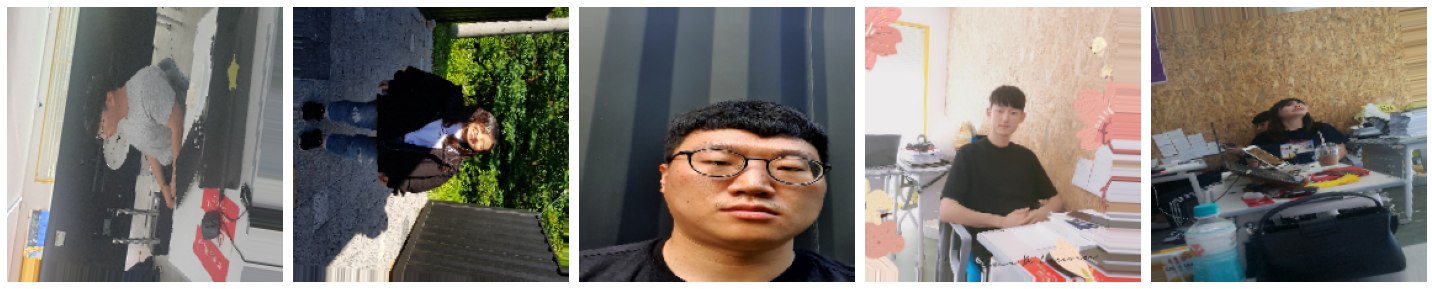

In [6]:
#train_data_gen에서 batch size만큼 학습이미지만 추출하여 확인

sample_training_images, _ = next(train_data_generator)

# 이미지 plot (1줄에 5개 출력)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])

## Create the model

- (1)convolution blocks (ImageNET을 사전 학습한 VGG16모델)
- (2)classifier (fully connected layer)
- Dense(1024)
- Dropout(0.5)
- Dense(2)

In [7]:

conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = Sequential([
            conv_layers,
            Flatten(),
            Dense(1024, activation='relu'),
            Dropout(0.5),
            Dense(18, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

58892288/58889256 [==============================] - 2s 0us/step


## Model summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 18)                18450     
Total params: 40,424,274
Trainable params: 25,709,586
Non-trainable params: 14,714,688
_________________________________________________________________


## Train the model

In [10]:
train_data_generator.samples

361

In [11]:
epochs=10

history = model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      validation_steps=5,
      steps_per_epoch=train_data_generator.samples/32,
      epochs= epochs
)


Epoch 1/10
12/11 [===============================] - 167s 14s/step - loss: 4.7246 - accuracy: 0.3934 - val_loss: 2.1919 - val_accuracy: 0.5437
Epoch 2/10
12/11 [===============================] - 54s 4s/step - loss: 1.5120 - accuracy: 0.6343 - val_loss: 2.2934 - val_accuracy: 0.6125
Epoch 3/10
12/11 [===============================] - 42s 4s/step - loss: 0.9385 - accuracy: 0.7285 - val_loss: 2.0305 - val_accuracy: 0.5750
Epoch 4/10
12/11 [===============================] - 43s 4s/step - loss: 0.6243 - accuracy: 0.8061 - val_loss: 2.1949 - val_accuracy: 0.6125
Epoch 5/10
12/11 [===============================] - 41s 3s/step - loss: 0.5511 - accuracy: 0.8089 - val_loss: 2.4057 - val_accuracy: 0.6250
Epoch 6/10
12/11 [===============================] - 41s 3s/step - loss: 0.4600 - accuracy: 0.8421 - val_loss: 2.2105 - val_accuracy: 0.6500
Epoch 7/10
12/11 [===============================] - 42s 3s/step - loss: 0.4705 - accuracy: 0.8449 - val_loss: 2.1607 - val_accuracy: 0.6562
Epoch 8/10


## Visualize training results

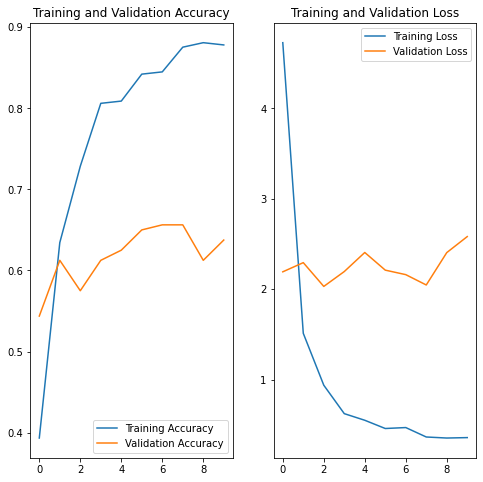

In [12]:
 epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict new test image

In [13]:
y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/32
)

custom_labels = list(test_data_generator.class_indices.keys())
predicted = np.argmax(y_, axis=1)
print(predicted.shape)
print(predicted[0], custom_labels[predicted[0]])
print(predicted[1], custom_labels[predicted[1]])

Instructions for updating:
Please use Model.predict, which supports generators.


Instructions for updating:
Please use Model.predict, which supports generators.


(219,)
1 CHOI Seong Min
14 박상지


In [14]:
model.save('/content/drive/My Drive/Model/vgg_image2.h5')

In [18]:
y_.shape
y_[0].argmax()

1

In [19]:
y_[0][]

array([0.000, 0.989, 0.001, 0.000, 0.001, 0.001, 0.004, 0.000, 0.000,
       0.000, 0.000, 0.000, 0.001, 0.000, 0.001, 0.000, 0.000, 0.000],
      dtype=float32)

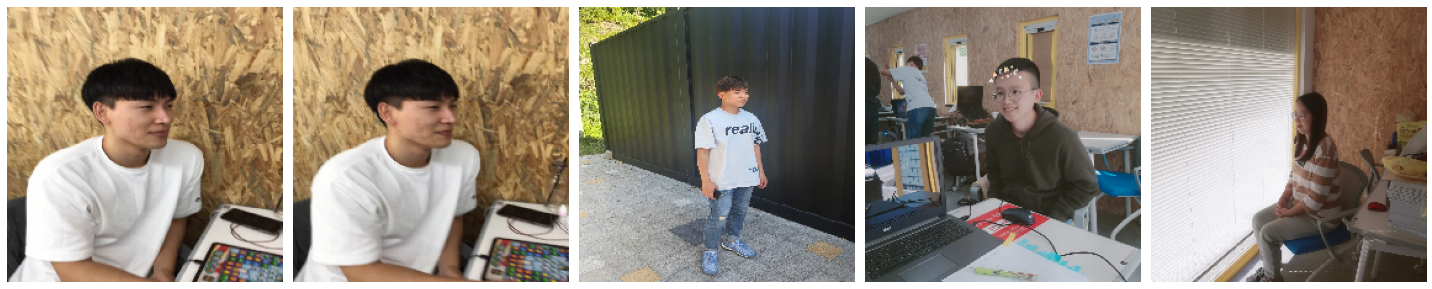

In [15]:
#test_data_gen에서 batch size만큼 이미지만 추출하여 확인

test_images, _ = next(test_data_generator)

# 이미지 plot (1줄에 5개 출력)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(test_images[:5])

In [16]:
print("-- Predict --")
output = model.predict_generator(test_data_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_data_generator.class_indices)
print(output)

-- Predict --
{'BINNA KIM': 0, 'CHOI Seong Min': 1, 'Jaerin': 2, 'JangHB': 3, 'Kim Minjeong': 4, 'LIM Choice': 5, 'LIM Kyeong Min': 6, 'Lee Jimilso': 7, 'Park Minu': 8, 'SHIN SooYong ': 9, 'Seung Huisu': 10, 'sujin': 11, '김동기': 12, '김정욱': 13, '박상지': 14, '박인서': 15, '이창윤': 16, '정용현': 17}
[[0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.033 0.001 0.030 ... 0.034 0.009 0.003]
 ...
 [0.010 0.000 0.005 ... 0.007 0.002 0.007]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.013 0.000 0.009 ... 0.004 0.700 0.000]]


In [ ]:
output.

<function ndarray.view>

In [17]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_data_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
Instructions for updating:
Please use Model.evaluate, which supports generators.


Instructions for updating:
Please use Model.evaluate, which supports generators.


accuracy: 66.87%
